In [2]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting

In [24]:
lookup_gesture = dict()
reverselookup_gesture = dict()
lookup_seq = dict()
reverselookup_seq = dict()
count = 0
count_seq = 0
for i in range(0, 2):
    for j in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'):
        if not j.startswith('.'): # If running this code locally, this is to ensure you aren't reading in hidden folders
                for k in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+
                                    '/sequences/' + j + '/' + 'train' + '/'):
                    for l in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+
                                    '/sequences/' + j + '/' + 'train' + '/' + k + '/'):
                        lookup_seq[j] = count_seq
                        reverselookup_seq[count_seq] = j
                        count_seq = count_seq +1
count_seq

11624

In [25]:
x_train = []
y_train = []
final_img_count_train = 0
seq_img_count  = 0
ges_img_count = 0
sub_img_count = 0
img_count = 0
for i in range(0, 2): # select 2 subject areas only
    ges_img_count = 0
    for j in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'):
        if not j.startswith('.'): # Again avoid hidden folders
            seq_img_count = 0 # To tally images of a given gesture
            for k in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                  + j + '/' + 'train' + '/'):
                if not k.startswith('.'): # Again avoid hidden folders
                    img_count = 0
                    for l in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                          + j + '/' + 'train' + '/' + k + '/'):
                        img = Image.open('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                          + j + '/' + 'train' + '/' + k + '/' + l).convert('L')
                        # Read in and convert to greyscale
                        img = img.resize((320, 120))
                        arr = np.array(img)
                        x_train.append(arr) 
                        img_count = img_count + 1
                        #y_values = np.full((img_count, 1), lookup_seq[j]) 
                        #y_values = lookup_seq[j]
                        y_values = str(j)
                        y_train.append(y_values)
                    seq_img_count = seq_img_count + img_count
            ges_img_count = ges_img_count + seq_img_count
            #print("ges_img_count",ges_img_count)
    sub_img_count = sub_img_count + ges_img_count
    #print("sub_img_count",sub_img_count)
final_img_count_train = final_img_count_train + sub_img_count        
print(final_img_count_train)
x_train = np.array(x_train, dtype = 'float32')
y_train = np.array(y_train)
#y_train = y_train.reshape(final_img_count_train, 1) # Reshape to be the correct size
#y_train = y_train.reshape(1, -1)

11624


In [37]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train1 = encoder.fit_transform(y_train)
print(y_train1)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [40]:
#import keras
#from keras.utils import to_categorical
#y_train = to_categorical(y_train,dtype='<U8')

In [39]:
print(x_train.shape)
print(y_train1.shape)
x_train.shape[1:]

(11624, 120, 320)
(11624, 11)


(120, 320)

In [42]:
x_test = []
y_test = []
final_img_count_test = 0
seq_img_count  = 0
ges_img_count = 0
sub_img_count = 0
img_count = 0
for i in range(0, 2): # select 2 subject areas only
    ges_img_count = 0
    for j in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'):
        if not j.startswith('.'): # Again avoid hidden folders
            seq_img_count = 0 # To tally images of a given gesture
            for k in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                + j + '/' + 'test' + '/'):
                if not k.startswith('.'): # Again avoid hidden folders
                    img_count = 0
                    for l in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                        + j + '/' + 'test' + '/' + k + '/'):
                        img = Image.open('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                          + j + '/' + 'test' + '/' + k + '/' + l).convert('L')
                        # Read in and convert to greyscale
                        img = img.resize((320, 120))
                        arr = np.array(img)
                        x_test.append(arr) 
                        img_count = img_count + 1
                        #y_values = np.full((img_count, 1), lookup_seq[j]) 
                        #y_values = lookup_seq[j]
                        y_values = str(j)
                        y_test.append(y_values)
                    seq_img_count = seq_img_count + img_count
            ges_img_count = ges_img_count + seq_img_count
            #print("ges_img_count",ges_img_count)
    sub_img_count = sub_img_count + ges_img_count
    #print("sub_img_count",sub_img_count)
final_img_count_test = final_img_count_test + sub_img_count        
print(final_img_count_test)
x_test = np.array(x_test, dtype = 'float32')
y_test = np.array(y_test)
#y_test = y_test.reshape(final_img_count_test, 1) # Reshape to be the correct size
#y_test = y_test.reshape(1, -1)

2935


In [43]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_test1 = encoder.fit_transform(y_test)
print(y_test1)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


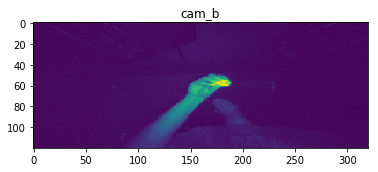

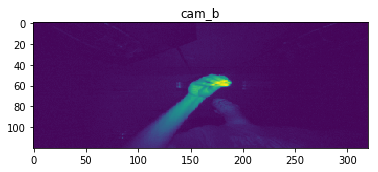

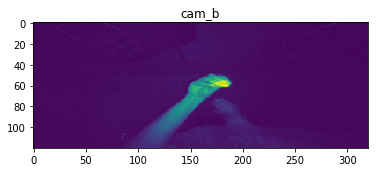

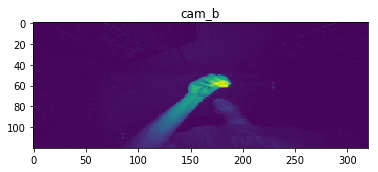

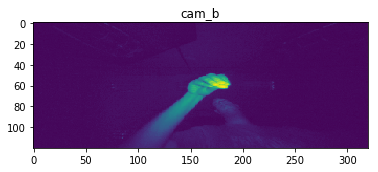

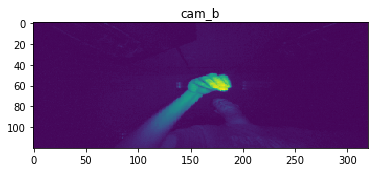

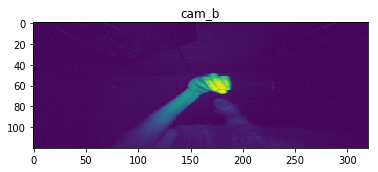

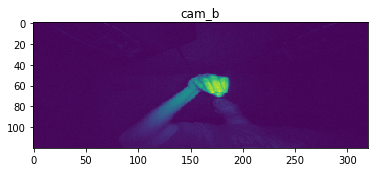

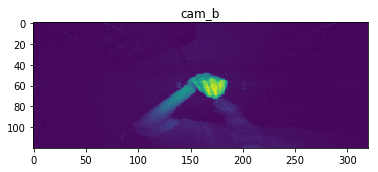

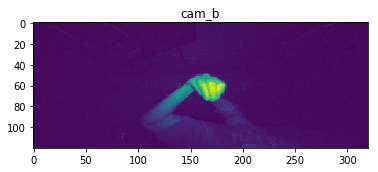

In [44]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_train[i])
    plt.title(reverselookup_seq[i])
    plt.show()

In [45]:
x_train = x_train.reshape((final_img_count_train, 120, 320, 1))
x_train /= 255
x_test = x_test.reshape((final_img_count_test,120,320,1))
x_test /= 255
x_train.shape

(11624, 120, 320, 1)

In [22]:
#from sklearn.model_selection import train_test_split
#x_validate,x_test_1,y_validate,y_test_1 = train_test_split(x_test,y_test,test_size = 0.5)

In [52]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, kernel_size=(4,4), strides=(1,1) , activation='relu',input_shape = (120,320,1)))
model.add(MaxPooling2D (pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(64, kernel_size=(5,5), strides=(1,1) , activation='relu'))
model.add(Flatten())
model.add(Dense(11, activation='relu'))
model.add(Dense(11, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 117, 317, 64)      1088      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 58, 158, 64)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 54, 154, 64)       102464    
_________________________________________________________________
flatten_3 (Flatten)          (None, 532224)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 11)                5854475   
_________________________________________________________________
dense_6 (Dense)              (None, 11)                132       
Total params: 5,958,159
Trainable params: 5,958,159
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
epochs = 1
batch_size = 64
model.fit(x_train, y_train1, epochs=epochs, batch_size=batch_size)

Epoch 1/1
11624/11624 [==============================] - 2531s 218ms/step - loss: 0.1569 - acc: 0.9442


In [56]:
[loss, acc] = model.evaluate(x_test,y_test1,verbose=1)
print("Accuracy:" + str(acc) + ":" + "Loss:" + str(loss))

2935/2935 [==============================] - 206s 70ms/step
Accuracy:0.9614372057037418:Loss:0.10266575862469758


In [ ]:
model.save('cnn_gesture.h5')

In [1]:
from keras.models import load_model
model = load_model('cnn')

SyntaxError: invalid syntax (<ipython-input-1-c57260fdb40a>, line 1)

In [ ]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

penultimate_layer = utils.find_layer_idx(model, 'conv2d_6')
layer_idx=-1 # last layer to be visualised

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([x_train[1], x_train[2]]):     
        grads = visualize_cam(model, layer_idx, filter_indices=20, 
                              seed_input=img, last_layer_idx=penultimate_layer,
                              backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))